<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Model/K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,15289.066761,91.692852,93.543760,1964.023094,2.495164,2.506487,2.500118,7.501769
std,1718.757878,99.688631,230.625413,8335.006464,1.118050,1.117619,1.118271,2.816126
min,12347.000000,0.000000,2.000000,2.900000,1.000000,1.000000,1.000000,3.000000
25%,13810.500000,17.000000,18.000000,308.840000,1.000000,2.000000,1.500000,5.000000
50%,15279.000000,50.000000,42.000000,674.520000,2.000000,3.000000,3.000000,8.000000
75%,16767.500000,141.000000,102.000000,1628.620000,3.000000,4.000000,3.500000,10.000000
max,18287.000000,373.000000,7840.000000,270287.500000,4.000000,4.000000,4.000000,12.000000


In [ ]:
#Applying on the data.
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 1.2578896378884323
Frequency Skewness : 17.977687113494753
Monetary Skewness : 20.657393220667444


In [ ]:
log_RFM_data = RFM_data[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



,Recency,Frequency,Monetary
count,4239.000000,4239.000000,4239.000000
mean,3.737734,3.750115,6.597104
std,1.468903,1.241810,1.232680
min,0.000000,0.693100,1.064700
25%,2.833200,2.890400,5.732800
50%,3.912000,3.737700,6.514000
75%,4.948800,4.625000,7.395500
max,5.921600,8.967000,12.507200


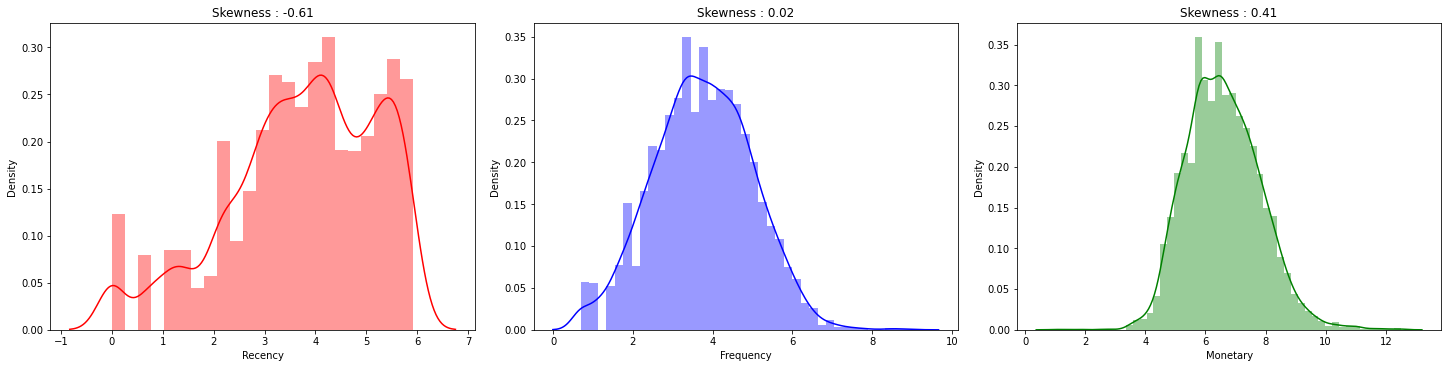

In [ ]:
#Plot after transformation for the distributions :
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_RFM_data[var].skew(),2).astype(str))
    i= i+1
log_RFM_data.describe()

In [ ]:
#Scaling the data


ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_RFM_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)

In [ ]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

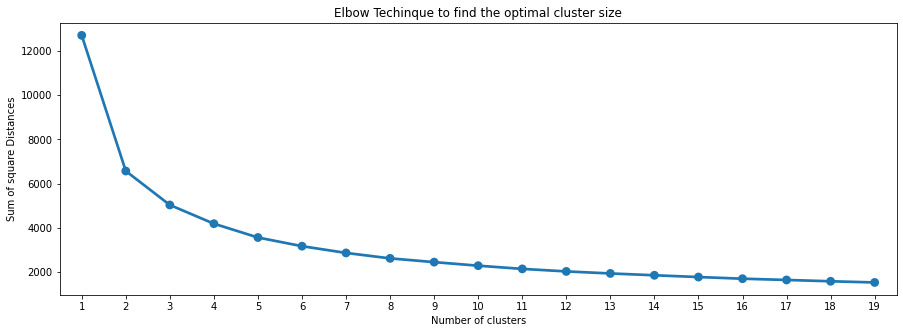

In [ ]:
#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")